# <font color = 'brown'>Lead Scoring Case Study</font>

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

### Goals and Objectives
There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### 1. Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

### 2. Data importing and understanding

In [2]:
# Importing the Data

lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Rows and Columns of the data set
lead_df.shape

(9240, 37)

- There are total 9240 rows and 37 columns in the data set

In [4]:
# Checking the columns and their data types
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking for the descriptive statistics
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


<b>Insights:</b>
1. Some variable has missing data
2. Some variables have high data variability

Let's check the data and do the required data cleaning process

### 3. Data cleaning and data manipulation

##### Replace all 'Select' values in the dataframe with np.nan

<b>Reason to remove the select variable :</b> Select variable does not provide any information regarding the data, It just means that the user has not answered anything for the particular question and it is better to treat them as missing values.

In [6]:
#Inspecting all the columns with Select variable in the dataframe.
colsHavingSelect = lead_df.isin(["Select"]).any()
print(colsHavingSelect)

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [7]:
# Replacing 'Select' values with NaN.
lead_df = lead_df.replace('Select', np.nan)

##### Checking the unique categories in the each categorical column</b>

In [8]:
# Checking the column with unique values
lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

- Now we will the drop the unique value columns as these will not significantly contribute to our model results.

In [9]:
# Dropping the unique valued columns
lead_df = lead_df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 
                      'I agree to pay the amount through cheque' ], axis = 1)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [10]:
# Checking the shape of the data frame after dropping them
lead_df.shape

(9240, 32)

##### Calculating the missing value percentage in each column

In [11]:
# Checking the null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [12]:
# Checking the null values in percentage
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

From the above snippet result, we can see that there are high missing value percentages in many columns and we must remove them.
- 'Lead Number' is not of any use for building the model. So we will drop it.
- "Lead Quality ","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score" columns have more than 45% NA Values. Hence dropping the columns.
- 'Tag' is given to customer manually. Hence droping the column

In [13]:
# Removing the columns with morethan 45% of missing values
lead_df = lead_df.drop(['Lead Number', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                        'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1)

In [14]:
#Inspect the columns after dropping high percentage of missing values
lead_df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
# Rechecking the missing value percentage
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

##### Use some imputation technique for the column with low percentage of null values
- Generally categorical columns are imputed with 'mode'
- Numerical columns are imputed with mean or median.

<b>1. Lead Source</b>

In [16]:
# Checking the imputation value for 'Lead Source' column.

lead_df['Lead Source'].mode()

0    Google
dtype: object

In [17]:
# Imputing the value in 'Lead Source' column.

lead_df['Lead Source'] = lead_df['Lead Source'].fillna('Google')

<b>2. TotalVisits</b>

In [18]:
# Checking the imputation value for 'TotalVisits' column.

lead_df.TotalVisits.median()

3.0

In [19]:
# Imputing the value in 'TotalVisits' column.

lead_df['TotalVisits'] = lead_df['TotalVisits'].fillna(3.0)

<b>3. Page Views Per Visit</b>

In [20]:
# Checking the imputation value for 'Page Views Per Visit' column.

lead_df['Page Views Per Visit'].median()

2.0

In [21]:
# Imputing the value in "Page Views Per Visit" column.

lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].fillna(2.0)

<b>4. Last Activity</b>

In [22]:
# Checking the imputation value for 'Last Activity' column.

lead_df['Last Activity'].mode()

0    Email Opened
dtype: object

In [23]:
# Imputing the value in "Last Activity" column.

lead_df['Last Activity'] = lead_df['Last Activity'].fillna('Email Opened')

<b>5. Country</b>

In [24]:
#Checking the imputation value for 'Country' column.

lead_df['Country'].mode()

0    India
dtype: object

In [25]:
# Imputing the value in "Country" column.

lead_df['Country'] = lead_df['Country'].fillna('India')

<b>6. Specialization</b>

In [26]:
#Checking the imputation value for 'Specialization' column.

lead_df['Specialization'].mode()

0    Finance Management
dtype: object

In [27]:
# Imputing the value in "Specialization" column.

lead_df['Specialization'] = lead_df['Specialization'].fillna('Finance Management')

<b>7. What is your current occupation</b>

In [28]:
#Checking the imputation value for 'What is your current occupation' column.

lead_df['What is your current occupation'].mode()

0    Unemployed
dtype: object

In [29]:
# Imputing the value in "What is your current occupation" column.

lead_df['What is your current occupation'] = lead_df['What is your current occupation'].fillna('Unemployed')

<b>8. What matter most to you in choosing a course</b>

In [30]:
#Checking the imputation value for 'What matter most to you in choosing a course' column.

lead_df['What matters most to you in choosing a course'].mode()

0    Better Career Prospects
dtype: object

In [31]:
# Imputing the value in "What matters most to you in choosing a course" column.

lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].fillna('Better Career Prospects')

<b>9. City</b>

In [32]:
#Checking the imputation value for 'City' column.

lead_df['City'].mode()

0    Mumbai
dtype: object

In [33]:
# Imputing the value in "City" columns.

lead_df['City'] = lead_df['City'].fillna('Mumbai')

<b>Checking the missing value again</b>

In [34]:
#Percentage of missing values in each column.

lead_df_null_count = round(lead_df.isnull().sum() * 100 / len(lead_df), 2)
lead_df_null_count

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

##### Checking the categorical columns that are highly skewed and drop them

In [35]:
# Check the columns which ara highly skewed by observing the unique value counts in each columns.

for column in lead_df:
    print(lead_df[column].astype('category').value_counts(normalize = True) * 100)
    print('=' * 50)

fffb0e5e-9f92-4017-9f42-781a69da4154    0.010823
56453aec-3f7b-4f30-870c-8f966d393100    0.010823
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    0.010823
53aabd84-5dcc-4299-bbe3-62f3764b07b1    0.010823
539ffa32-1be7-4fe1-b04c-faf1bab763cf    0.010823
                                          ...   
aa4180a5-84f1-4e67-8d90-0c8403070a59    0.010823
aa405742-17ac-4c65-b19e-ab91c241cc53    0.010823
aa30ebb2-8476-41ce-9258-37cc025110d3    0.010823
aa27a0af-eeab-4007-a770-fa8a93fa53c8    0.010823
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    0.010823
Name: Prospect ID, Length: 9240, dtype: float64
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral

- From the above value_counts, there are many skewed columns in which almost more than 90% of the data points contain the same values. These skewed columns need to be dropped as it will not affect much in our analysis.

<b>1. Lead Source</b>

In [36]:
# Perform bucketing on columns which are highly skewed but important.

lead_df['Lead Source'] = lead_df['Lead Source'].replace('google', 'Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing', 'Click2call', 'Press_Release', 'Social Media','Live Chat', 'Pay per Click Ads', 'welearnblog_Home',
                                                            'NC_EDM', 'WeLearn', 'blog', 'testone', 'youtubechannel'], 'Others')

In [37]:
# Check for unique value counts after bucketing in "Lead Source" column.

lead_df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

<b>2. Last Activity

In [38]:
# Perform bucketing on columns which are highly skewed but important.

lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Approached upfront', 'View in browser link Clicked',
                                                                'Email Marked Spam', 'Email Received',
                                                                'Resubscribed to emails', 
                                                                'Visited Booth in Tradeshow'], 'Others')

In [39]:
# Check for unique value counts after bucketing in "Last Activity" column.

lead_df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

<b>3. Country</b>

In [40]:
# Perform bucketing on columns which are highly skewed but important.

lead_df['Country'] = lead_df['Country'].replace(['Singapore', 'Saudi Arabia', 'United Kingdom', 'Australia', 'Qatar', 
                                                     'Bahrain', 'Hong Kong', 'Oman', 'France', 'unknown', 'Nigeria', 
                                                     'South Africa', 'Canada', 'Kuwait', 'Germany', 'Sweden', 'Bangladesh', 
                                                     'Netherlands', 'Italy', 'Ghana', 'China', 'Asia/Pacific Region', 
                                                     'Philippines', 'Uganda', 'Belgium', 'Liberia', 'Switzerland', 'Vietnam', 
                                                     'Malaysia', 'Sri Lanka', 'Russia', 'Indonesia', 'Kenya', 'Tanzania', 
                                                     'Denmark'], 'Others')

In [41]:
# Check for unique value counts after bucketing in "Country" column.

lead_df["Country"].value_counts()

India                   8953
Others                   165
United States             69
United Arab Emirates      53
Name: Country, dtype: int64

<b>4. Last Notable Activity</b>

In [42]:
# Perform bucketing on columns which are highly skewed but important.

lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable',
                                                                         'Had a Phone Conversation', 'Email Marked Spam','Approached upfront', 'Email Received',
                                                                          'Resubscribed to emails','View in browser link Clicked','Form Submitted on Website'], 'Others')   

In [43]:
# Check for unique value counts after bucketing in "Last Notable Activity" column.

lead_df['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

In [44]:
# Dropping highly skewed columns.

lead_df = lead_df.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                            'Digital Advertisement', 'Through Recommendations'], axis = 1)

In [45]:
# Check all columns from dataframe after dropping highly skewed dataframe. 

lead_df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
# Checking the shape of the data frame
lead_df.shape

(9240, 16)

- Since there are no more missing values, we have cleaned the data thoroughly.
- Now we can proceed for our further analysis

### 4. Exploratory Data Analysis

##### Checking the Outliers for Numerical columns

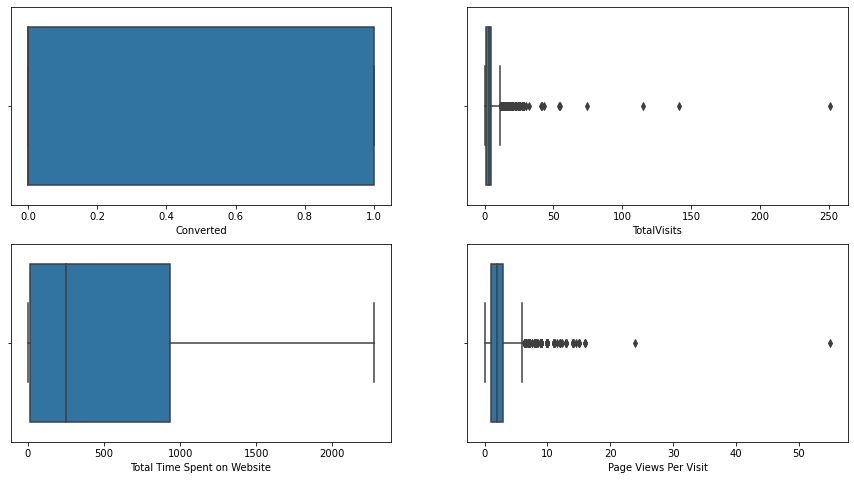

In [47]:
# Plot to check outliers in numerical columns.

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(lead_df['Converted'])
plt.subplot(2,2,2)
sns.boxplot(lead_df['TotalVisits'])
plt.subplot(2,2,3)
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.subplot(2,2,4)
sns.boxplot(lead_df['Page Views Per Visit'])

plt.show()

- 'TotalVisits' and 'Page Views Per Visit' contains outliers especially in the higher values. So we need cap the upper set of values.

In [48]:

#creating a list of numeric columns

features = lead_df[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [49]:
# Capping the outliers

for col in features:
    percentiles = lead_df[col].quantile([0.01,0.95]).values
    lead_df[col][lead_df[col] <= percentiles[0]] = percentiles[0]
    lead_df[col][lead_df[col] >= percentiles[1]] = percentiles[1]

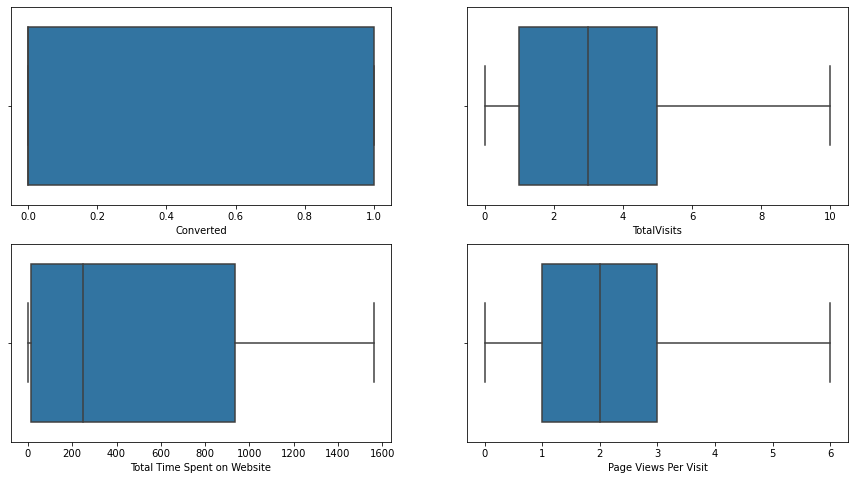

In [50]:
# Plot to check outliers after outlier treatment in numerical columns.

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(lead_df['Converted'])
plt.subplot(2,2,2)
sns.boxplot(lead_df['TotalVisits'])
plt.subplot(2,2,3)
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.subplot(2,2,4)
sns.boxplot(lead_df['Page Views Per Visit'])

plt.show()

In [51]:
# Checking the info of the dataframe after capping
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

##### Droping 'Others' category

In [52]:
# Dropping the "Others" category from all the columns.

Catog_df = lead_df.select_dtypes(exclude = ["int64", "float64"]).columns
Catog_df

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [53]:
# Dropping the "Others" category from all the columns.

for i in Catog_df:
    lead_df = lead_df.loc[~((lead_df[i] == "Others"))]

##### Univariate Analysis for Categorical Variables

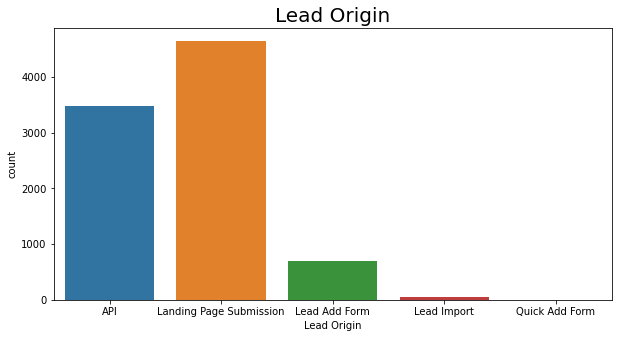

In [54]:
# Univariate analysis for "Lead Origin" column.

plt.figure(figsize = (10, 5))
sns.countplot(lead_df['Lead Origin'])
plt.title('Lead Origin', fontsize = 20)

plt.show()

<b>Insights:</b>
- Most of the customer is identified by Landing Page Submission.

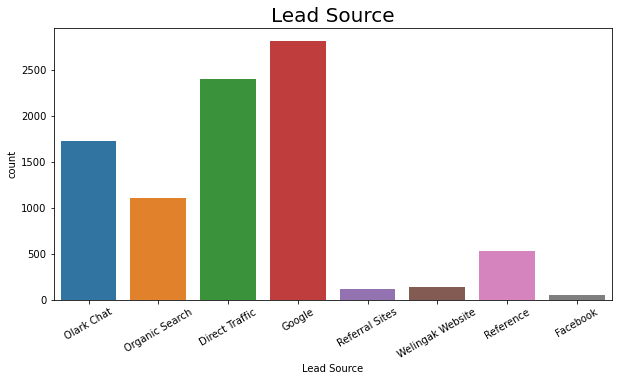

In [55]:
# Univariate analysis for "Lead Source" column.

plt.figure(figsize = (10, 5))
sns.countplot(lead_df['Lead Source'])
plt.xticks(rotation = 30)
plt.title('Lead Source', fontsize = 20)

plt.show()

<b>Insights:</b>
- Most of the customer are from Google and Direct traffic to X education website.

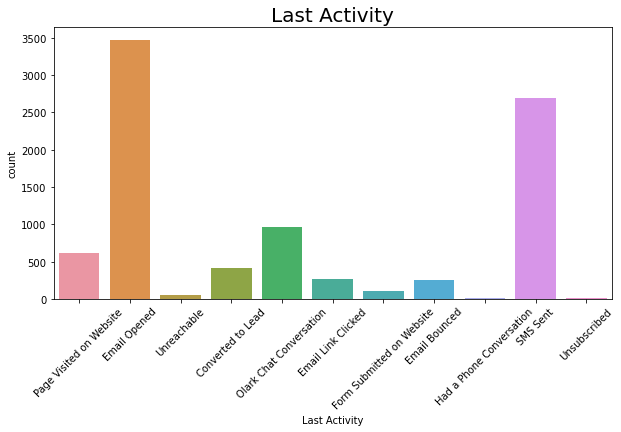

In [56]:
# Univariate analysis for 'Last Activity' column.

plt.figure(figsize = (10, 5))
sns.countplot(lead_df['Last Activity'])
plt.xticks(rotation = 45)
plt.title("Last Activity", fontsize = 20)
plt.show()

<b>Insights:</b>
- Most of the customers has performed last activity as Email Opened and SMS Sent.

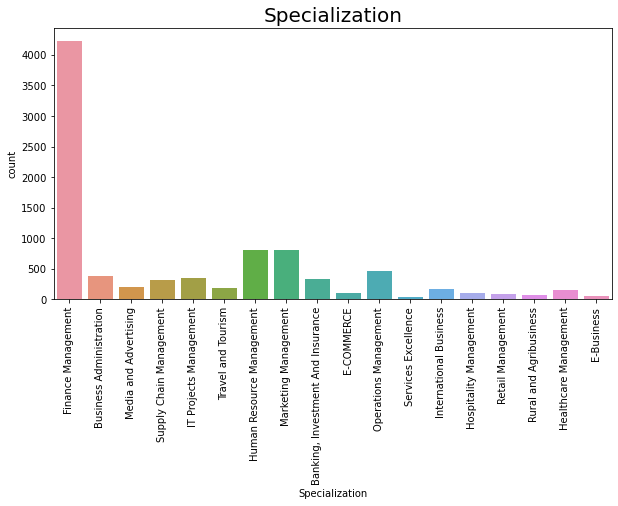

In [57]:
# Univariate analysis for 'Specialization' column.

plt.figure(figsize = (10, 5))
sns.countplot(lead_df['Specialization'])
plt.xticks(rotation = 90)
plt.title("Specialization", fontsize = 20)

plt.show()

<b>Insights:</b>
- Most of the customers are from Finance Management specialization and worked there before.

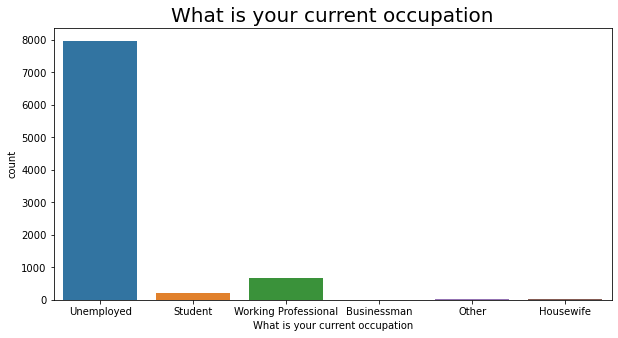

In [58]:
# Univariate analysis for 'What is your current occupation' column.

plt.figure(figsize = (10, 5))
sns.countplot(lead_df['What is your current occupation'])
plt.title('What is your current occupation', fontsize = 20)

plt.show()

<b>Insights:</b>
- Most of the customers are Unemployed

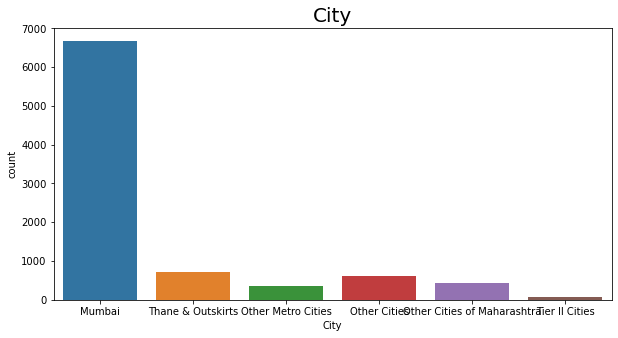

In [59]:
# Univariate analysis for 'City' column.

plt.figure(figsize = (10, 5))
sns.countplot(lead_df['City'])
plt.title('City', fontsize = 20)

plt.show()

<b>Insights:</b>
- Most of the customers are from Mumbai City.

##### Univariate Analysis of Categorical Variables with respect to "Converted" column.

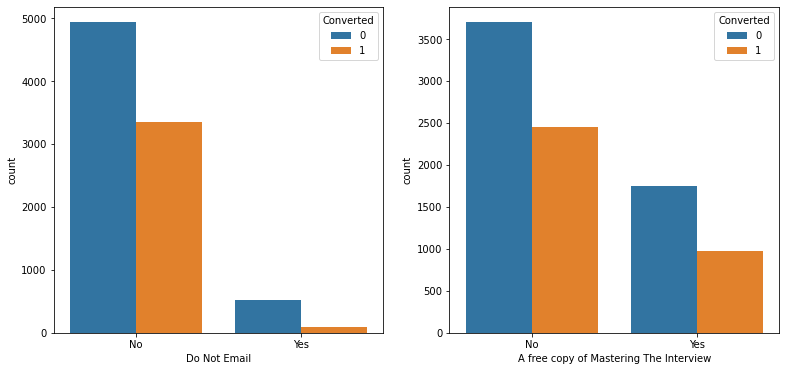

In [60]:
# Univariate analysis of 'Do Not Email' and 'A free copy of Mastering The Interview' with 'Converted' column.

plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
sns.countplot(lead_df['Do Not Email'],hue = lead_df.Converted)

plt.subplot(1,2,2)
sns.countplot(lead_df['A free copy of Mastering The Interview'],hue = lead_df.Converted)

plt.show()

<b>Insights:</b>
- Most of the leads do not want to be emailed about the course and also do not want the free copy of mastering the interview.
- Those leads who do not want to be emailed have high chances of getting converted.

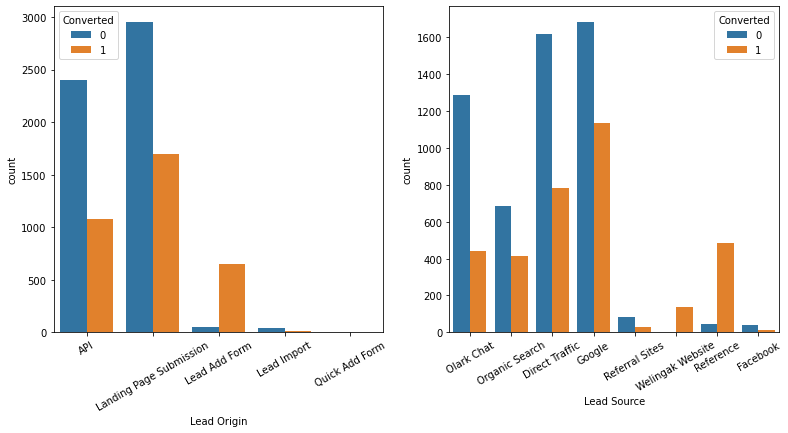

In [61]:
# Univariate analysis of 'Lead Origin' and 'Lead Source' with 'Converted' column.

plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
sns.countplot(lead_df['Lead Origin'], hue = lead_df.Converted)
plt.xticks(rotation = 30)

plt.subplot(1,2,2)
sns.countplot(lead_df['Lead Source'], hue = lead_df.Converted)
plt.xticks(rotation = 30)

plt.show()

<b>Insights:</b>

Observation from Lead Origin:
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- API and Landing Page Submission bring higher number of leads as well as conversion.
- In order to improve overall lead conversion rate, we need to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

Observation from Lead Source:
- Reference and Welingak Website have very high conversion rate but count of leads are not very high.
- Google, Direct Traffic and Olark Chat bring higher number of leads as well as conversion.

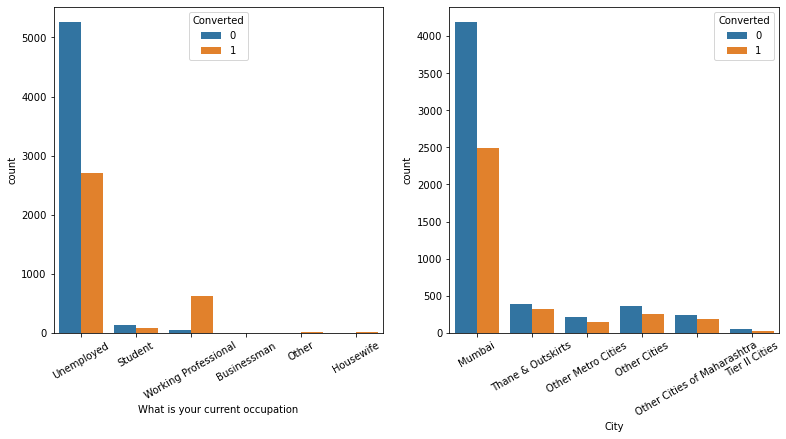

In [62]:
# Univariate analysis of 'What is your current occupation' and 'City' with 'Converted' column.

plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
sns.countplot(lead_df['What is your current occupation'], hue = lead_df.Converted)
plt.xticks(rotation = 30)

plt.subplot(1,2,2)
sns.countplot(lead_df['City'], hue = lead_df.Converted)
plt.xticks(rotation = 30)

plt.show()

<b>Insights:</b>
- Working professional checking about the course have high chances of joining the course.
- Higher number of leads as well as conversion from Unemployed category.
- Mumbai has the highest number of leads as well as conversion.

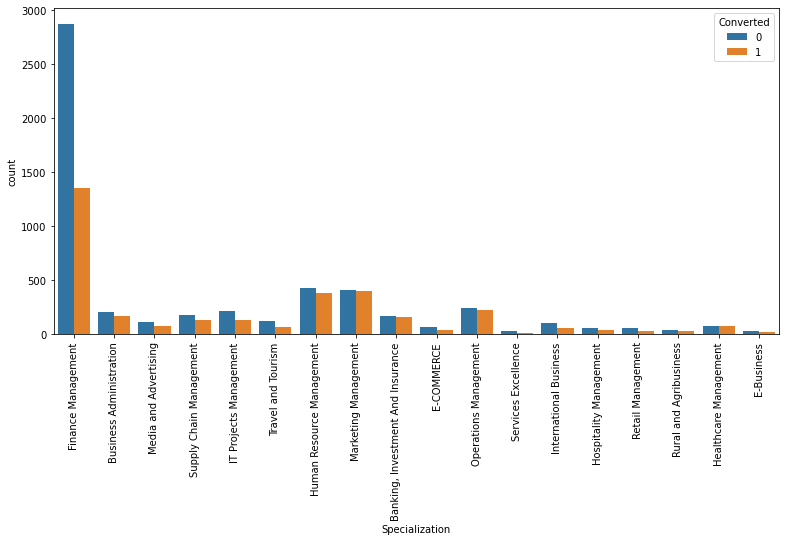

In [63]:
# Univariate analysis of 'Specialization' with 'Converted' column.

plt.figure(figsize = (13,6))
sns.countplot(lead_df.Specialization, hue = lead_df.Converted)
plt.xticks(rotation = 90)

plt.show()

<b>Insights:</b>
- Finance Management, Human Resource Management, Marketing Management, Operations Management are showing reasonably good results in terms of count of leads as well as conversion.

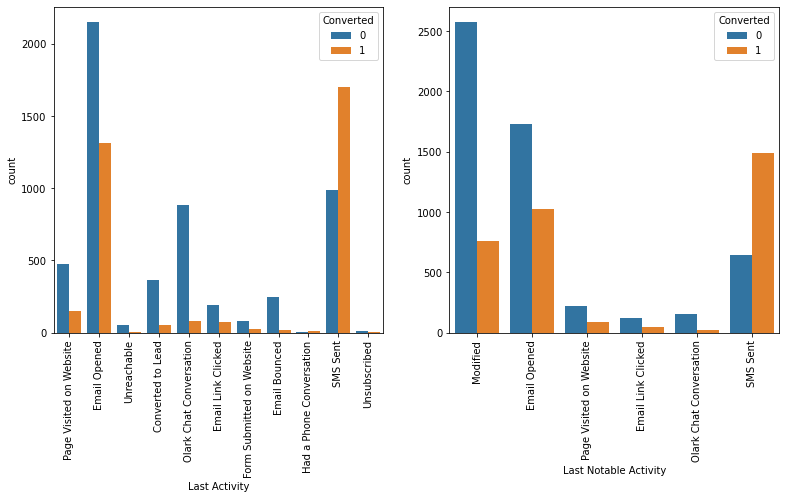

In [64]:
# Univariate analysis of 'Last Activity' and 'Last Notable Activity' with 'Converted' column.

plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
sns.countplot(lead_df['Last Activity'], hue = lead_df.Converted)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(lead_df['Last Notable Activity'], hue = lead_df.Converted)
plt.xticks(rotation = 90)

plt.show()

<b>Insights:</b>
- Although the count is high for 'Email Opened', but the highest conversion rate from 'SMS Sent' Category.
- High Conversion rate is for 'Email Opened' and 'SMS Sent' Category.
- Lead count is highest for 'Modified' and 'Email Opened' category.

##### Univariate analysis for Numerical Values

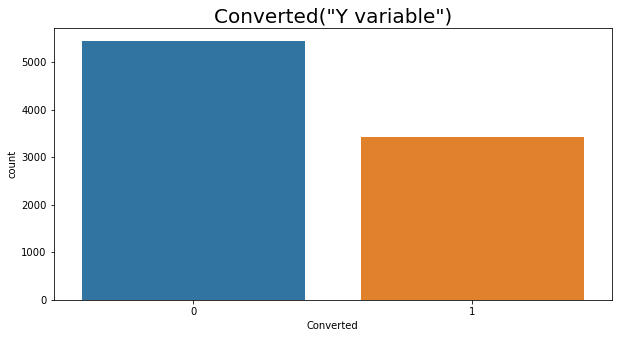

In [65]:
# Univariate analysis for 'Converted' continous variable.

plt.figure(figsize = (10, 5))
sns.countplot(lead_df['Converted'])
plt.title('Converted("Y variable")', fontsize = 20)

plt.show()

<b>Insights:</b>
- Most of the customer are not converted.

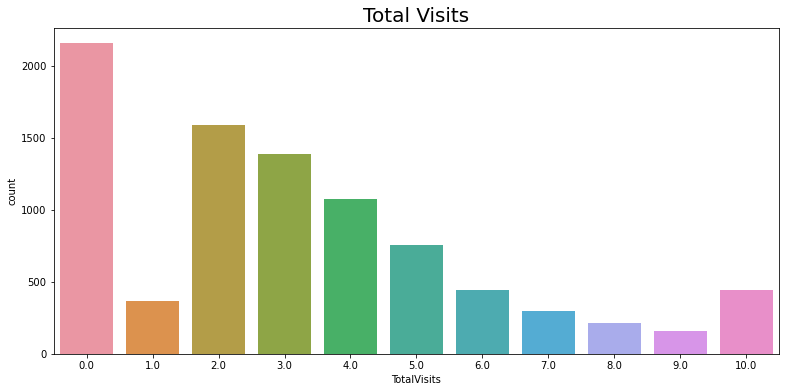

In [66]:
# Univariate analysis for 'TotalVisits' continous variable.

plt.figure(figsize = (13, 6))
sns.countplot(lead_df['TotalVisits'])
plt.title('Total Visits', fontsize = 20)

plt.show()

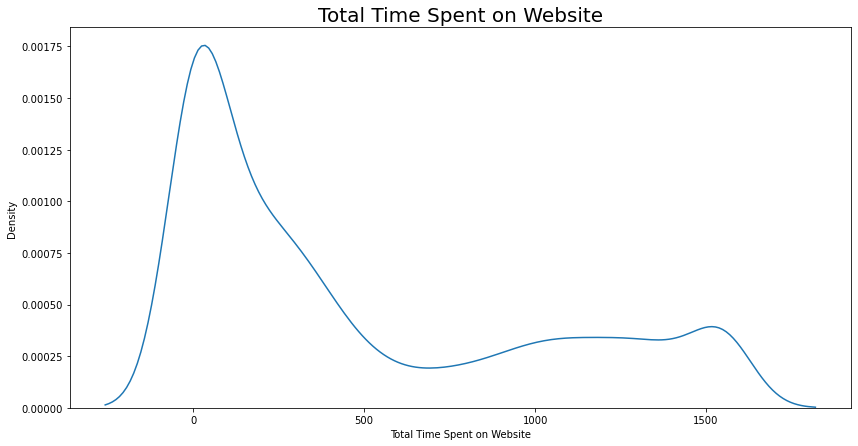

In [67]:
# Univariate analysis for 'Converted' continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(lead_df['Total Time Spent on Website'], hist = False, label = 'The total time spend by the customer on the website.')
plt.title("Total Time Spent on Website", fontsize = 20)

plt.show()

- There are very low customers whi spends more time on website.

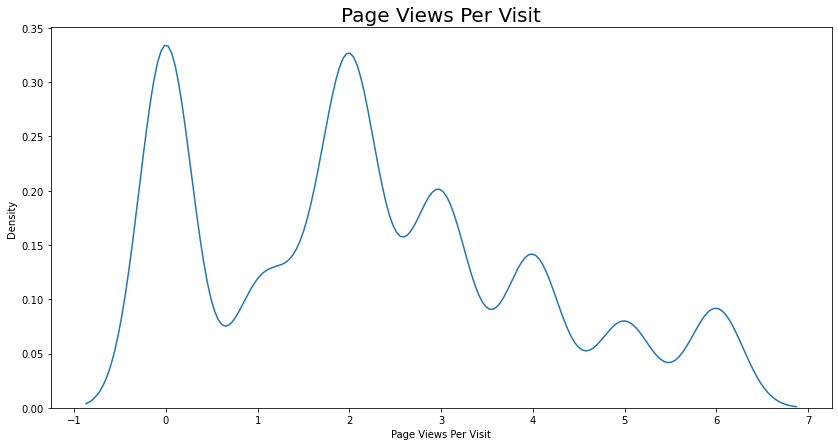

In [68]:
# Univariate analysis for 'Total Time Spent on Website' continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(lead_df['Page Views Per Visit'], hist = False, label = 'Average number of pages on the website viewed during the visits.')
plt.title('Page Views Per Visit', fontsize = 20)

plt.show()

- Most customers are visited 4 pages and there are very less customers who visited more than 4 pages.

##### Bivariate Analysis for Continous - Categorical Variables.

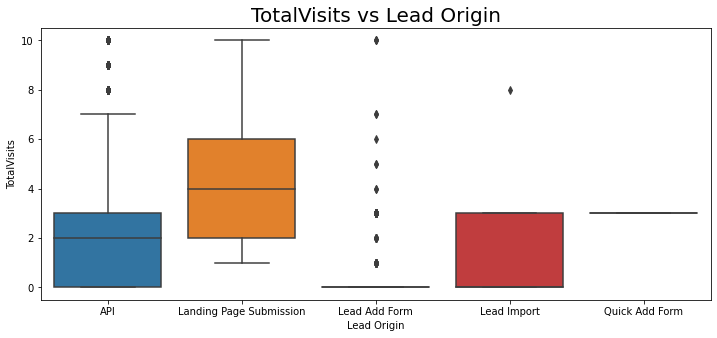

In [69]:
# Bivariate analysis for 'Lead Origin' 'Total Visits' variables.

plt.figure(figsize = (12, 5))
sns.boxplot(x = 'Lead Origin', y = 'TotalVisits', data = lead_df)
plt.xlabel('Lead Origin')
plt.ylabel('TotalVisits')
plt.title('TotalVisits vs Lead Origin', fontsize = 20)

plt.show()

<b>Insights:</b>
- The customers who has origin as 'Landing Page Submission' has higher amount of total visits followed by 'API' and 'Lead import'.

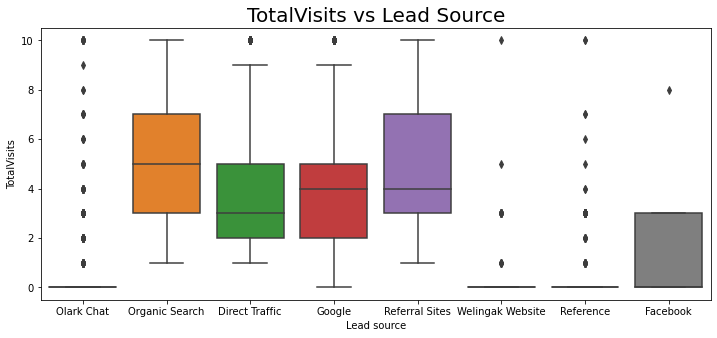

In [70]:
# Bivariate analysis for 'Lead Source' and 'Total Visits' variables.

plt.figure(figsize = (12, 5))
sns.boxplot(x = 'Lead Source', y = 'TotalVisits', data = lead_df)
plt.xlabel('Lead source')
plt.ylabel('TotalVisits')
plt.title('TotalVisits vs Lead Source', fontsize = 20)

plt.show()

<b>Insights:</b>
- The customers who has source as Organic Search has higher amount of total visits followed by Referral Sites Lead Source, Direct Traffic and Google.

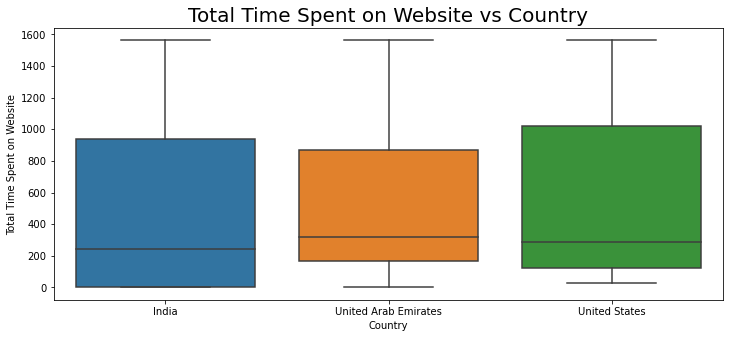

In [71]:
#Bivariate analysis for 'Country' 'Total Time Spent on Website' variables.

plt.figure(figsize = (12, 5))
sns.boxplot(x = 'Country', y = 'Total Time Spent on Website', data = lead_df)
plt.xlabel('Country')
plt.ylabel('Total Time Spent on Website')
plt.title('Total Time Spent on Website vs Country', fontsize = 20)

plt.show()

- Almost every country has same amount of time spent on website.

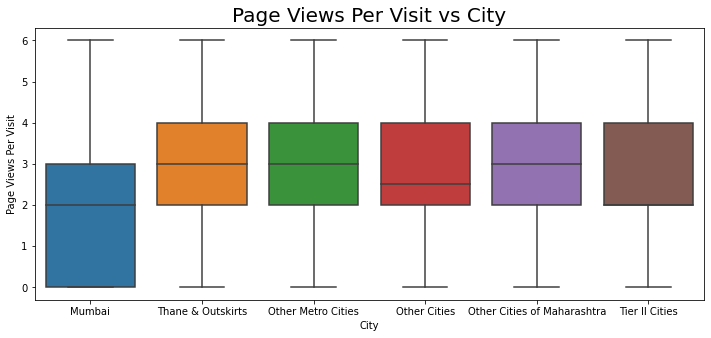

In [72]:
# Bivariate analysis for 'City' and 'Page Views Per Visit' variables.

plt.figure(figsize = (12, 5))
sns.boxplot(x = 'City', y = 'Page Views Per Visit', data = lead_df)
plt.xlabel('City')
plt.ylabel('Page Views Per Visit')
plt.title('Page Views Per Visit vs City', fontsize = 20)

plt.show()

- Every city has almost same number of page views per visit except Mumbai has less number of Page Views Per Visit.

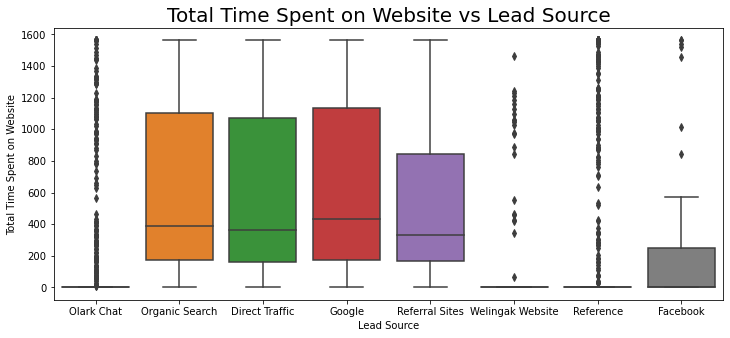

In [73]:
# Bivariate analysis for 'Lead Source' and 'Total Time Spent on Website' variables.

plt.figure(figsize = (12, 5))
sns.boxplot(x = 'Lead Source', y = 'Total Time Spent on Website', data = lead_df)
plt.xlabel('Lead Source')
plt.ylabel('Total Time Spent on Website')
plt.title('Total Time Spent on Website vs Lead Source', fontsize = 20)

plt.show()

- The customer who has lead source as "Google", "Direct Traffic", "Organic search" has higher time spent of website.

##### Bivariate Analysis for Categorical - Categorical variables.

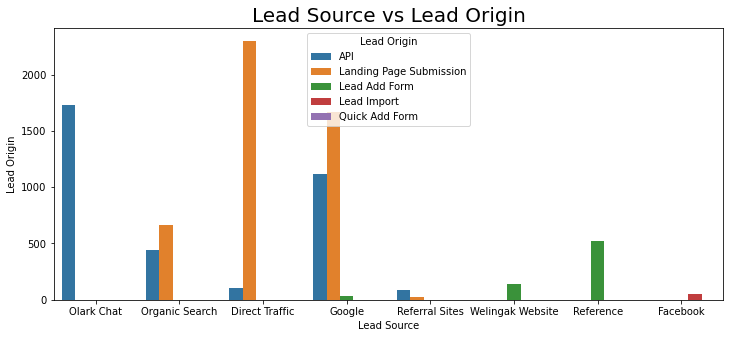

In [74]:
# Bivariate analysis for Lead Source" "Lead Origin" variables.

plt.figure(figsize = (12, 5))
sns.countplot(x = 'Lead Source', hue = 'Lead Origin', data = lead_df)
plt.xlabel('Lead Source')
plt.ylabel('Lead Origin')
plt.xticks(rotation = 0)
plt.title('Lead Source vs Lead Origin', fontsize = 20)

plt.show()

<b>Insights:</b>
- The Olark Chat source has API as its origin most of times.
- The most customer which are from Direct Traffic source has origin as Landing Page Submission.
- The most customer which are from Google source has origin as Landing Page Submission.

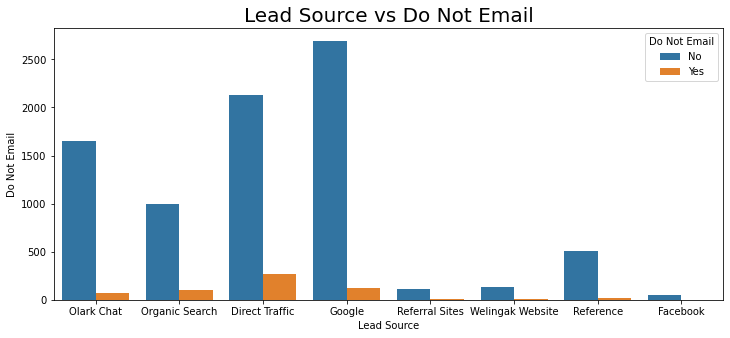

In [75]:
# Bivariate analysis for 'Lead Source' and 'Do Not Email' variables.

plt.figure(figsize = (12, 5))
sns.countplot(x = 'Lead Source', hue = 'Do Not Email', data = lead_df)
plt.xlabel('Lead Source')
plt.ylabel('Do Not Email')
plt.xticks(rotation = 0)
plt.title('Lead Source vs Do Not Email', fontsize = 20)

plt.show()

- The customers who has source as Google, Direct Traffic, Olark Chat and Organic Search does not want to be emailed.

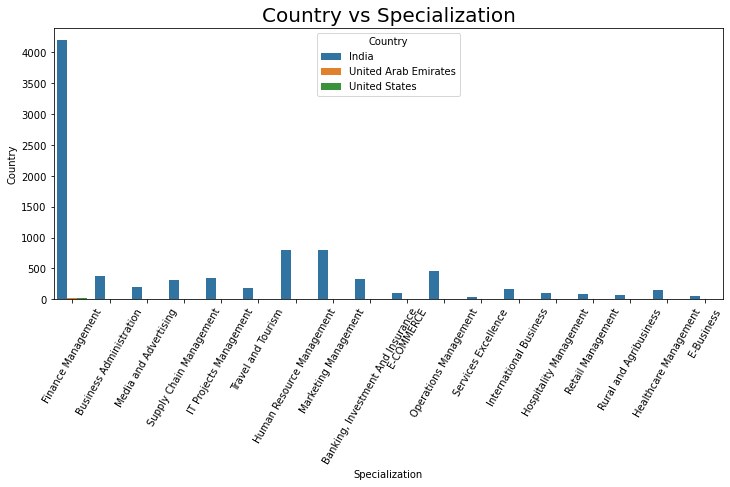

In [76]:
# Bivariate analysis for 'Country' and 'Specialization' variables.

plt.figure(figsize = (12, 5))
sns.countplot(x = 'Specialization', hue = 'Country', data = lead_df)
plt.xlabel('Specialization')
plt.ylabel('Country')
plt.xticks(rotation = 60)
plt.title('Country vs Specialization', fontsize = 20)

plt.show()

- Customers which are from India has highest Specialization as Finance Management.

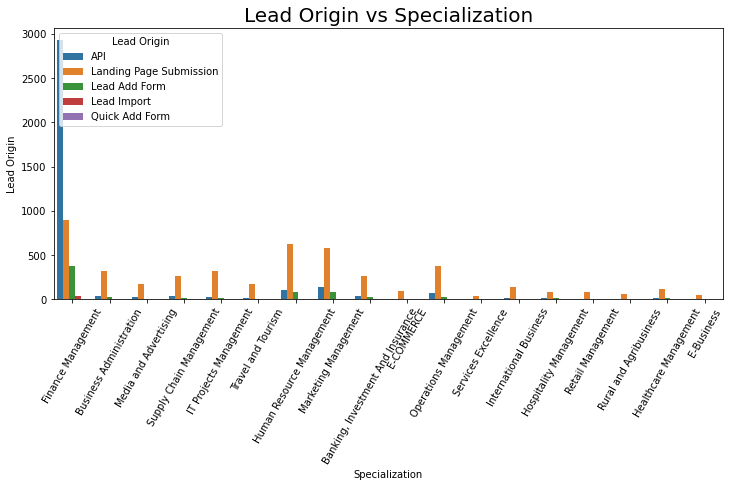

In [77]:
# Bivariate analysis for 'Specialization' and  'Lead Origin' variables.

plt.figure(figsize = (12, 5))
sns.countplot(x = 'Specialization', hue = 'Lead Origin', data = lead_df)
plt.xlabel('Specialization')
plt.ylabel('Lead Origin')
plt.xticks(rotation = 60)
plt.title('Lead Origin vs Specialization', fontsize = 20)

plt.show()

<b>Insights:</b>
- The customer who has specialization as Finance Management has Origin as API and Landing Page Submission.
- From every specialization most of the customers has origin as Landin Page submission.

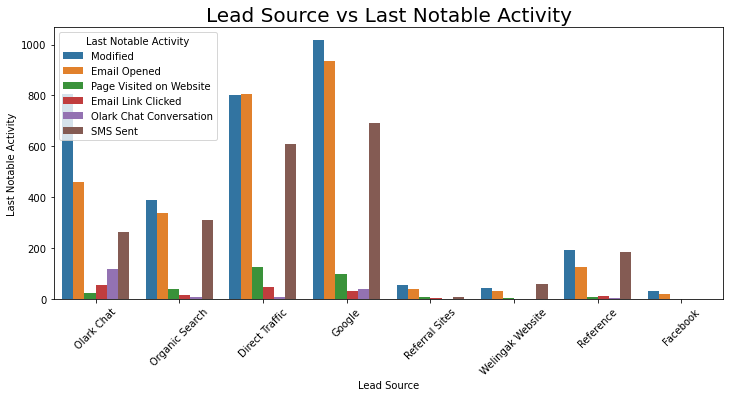

In [78]:
# Bivariate analysis for 'Specialization' and 'Lead Origin' variables.

plt.figure(figsize = (12, 5))
sns.countplot(x = 'Lead Source', hue = 'Last Notable Activity', data = lead_df)
plt.xlabel('Lead Source')
plt.ylabel('Last Notable Activity')
plt.xticks(rotation = 45)
plt.title('Lead Source vs Last Notable Activity', fontsize = 20)

plt.show()

- Most of the customers which has Source as Google, Direct traffic, Olark Chat and Organic Search has Last notable activity as Modified and Email Opened.

### 5. Data Preparation

In our dataframe we have one column which is sales team column. This column is generated once the sales team get into call with the student so we need to drop it.

In [79]:
# Dropping the 'Last Activity' column.

lead_df = lead_df.drop(['Last Activity'], axis = 1)
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No,Modified


In [80]:
# Checking shape of dataset after dropping column.

lead_df.shape

(8884, 15)

##### Converting some binary variables (Yes/No) to (0/1).

In [81]:
# Get list of fetures which has Yes/No values.
Feature_List = ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining a Function to convert features into binary.
def binary_conversion(x):
    return x.map({'Yes' : 1, 'No' : 0})

# Applying function to the features.
lead_df[Feature_List] = lead_df[Feature_List].apply(binary_conversion)

In [82]:
# Checking top 5 rows from dataframe after converting some variables in binary.

lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,0,Modified


##### Create Dummy variables

In [83]:
## Creating a dummy variable for some of the categorical variables and dropping the first one.

Dummy_Variables = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Country', 'Specialization',
                                            'What is your current occupation', 'What matters most to you in choosing a course',
                                           'City', 'Last Notable Activity']], drop_first = True)

# Adding the result into main dataframe.

lead_df = pd.concat([lead_df, Dummy_Variables], axis = 1)
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [84]:
# Dropping the repeated variables.

lead_df = lead_df.drop(['Prospect ID', 'Lead Origin', 'Lead Source', 'Country', 'Specialization', 
                            'What is your current occupation', 'What matters most to you in choosing a course',
                            'City', 'Last Notable Activity'], 1)
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


##### Spliting the Data in to Train - Test set

In [85]:
# Putting feature variable to X.

X = lead_df.drop('Converted',  axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [86]:
# Putting response variable to y

y = lead_df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Import library
from sklearn.model_selection import train_test_split

# Split the dataset into 70% train data and 30% test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6218 entries, 2609 to 1355
Data columns (total 52 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             6218 non-null   int64  
 1   TotalVisits                                                              6218 non-null   float64
 2   Total Time Spent on Website                                              6218 non-null   int64  
 3   Page Views Per Visit                                                     6218 non-null   float64
 4   A free copy of Mastering The Interview                                   6218 non-null   int64  
 5   Lead Origin_Landing Page Submission                                      6218 non-null   uint8  
 6   Lead Origin_Lead Add Form                                            

##### Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
# Check top 5 rows from train data.

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [91]:
# Perform scalling on data.

scaler = StandardScaler()
numerical_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2609,0,0.688207,-0.881578,1.573477,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3971,0,2.507471,2.054784,2.136005,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
324,0,1.052060,-0.501778,0.448420,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
7127,0,1.779765,-0.411080,1.010949,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3064,0,-0.039498,-0.371399,-0.114108,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0


In [92]:
X_train.shape

(6218, 52)

#### Checking conversion rate before modeling

In [93]:
#Checking the Converted Rate
Converted_Rate = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted_Rate

38.665015758667266

- We can see that conversion rate before modelling is found to be around 38.66%

### 6. Model Building

- Here we will use RFE for feature selection as we have lot of variables and checking one by one is not an efficient way to do so.
- Mixed method is going to be followed
- 15 best features will be choosen using RFE
- Using P values and VIF we will proceed for further elemination

##### Using statsmodel and RFE technique

In [94]:
import statsmodels.api as sm

In [95]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create object of RFE and run RFE with 15 variables.

logistic_regression = LogisticRegression()

rfe = RFE(logistic_regression, 15)
rfe = rfe.fit(X_train, y_train)

In [96]:
# Check result after RFE for each column.

rfe.support_

array([ True, False,  True, False, False,  True,  True, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False,  True])

In [97]:
# Check the ranking of columns from result of RFE.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Facebook', False, 7),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Country_United Arab Emirates', False, 11),
 ('Country_United States', False, 14),
 ('Specialization_Business Administration', False, 20),
 ('Specialization_E-Business', False, 24),
 ('Specialization_E-COMMERCE', False, 35),
 ('Specialization_Finance Management', False, 2),
 ('Specialization_Healthcare Management', False, 28),
 ('Specialization_Hos

In [98]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Quick Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_Retail Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [99]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Country_United Arab Emirates',
       'Country_United States', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain 

#### Model 1

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logistic_model_1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logistic_model_1.fit()
# Lets see the summary of our model.
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6202
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.1
Date:                Mon, 12 Apr 2021   Deviance:                       5202.2
Time:                        22:01:18   Pearson chi2:                 6.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

The variable "Lead Origin_Quick Add Form" has very high p-value, So we drop it.

In [101]:
# Dropping the column which have high p-value

col = col.drop("Lead Origin_Quick Add Form", 1)

#### Model 2

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logistic_model_2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logistic_model_2.fit()
# Lets see the summary of our model.
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6203
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.4
Date:                Mon, 12 Apr 2021   Deviance:                       5204.7
Time:                        22:01:18   Pearson chi2:                 6.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Let's check VIF also

In [103]:
#Import the library for VIF. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,5.55
2,Lead Origin_Landing Page Submission,3.57
4,Lead Source_Olark Chat,2.26
3,Lead Origin_Lead Add Form,1.83
11,Last Notable Activity_Email Opened,1.79
13,Last Notable Activity_SMS Sent,1.65
10,What is your current occupation_Working Profes...,1.55
5,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.28
0,Do Not Email,1.15


The variable "What is your current occupation_Housewife" has high p-value. so we can drop it.

In [105]:
# Dropping the column with high p-value

col = col.drop('What is your current occupation_Housewife', 1)

#### Model 3

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logistic_model_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logistic_model_3.fit()
# Chcek the summary of our model.
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6204
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.8
Date:                Mon, 12 Apr 2021   Deviance:                       5207.6
Time:                        22:01:19   Pearson chi2:                 6.61e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [107]:
vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,5.52
2,Lead Origin_Landing Page Submission,3.56
4,Lead Source_Olark Chat,2.26
3,Lead Origin_Lead Add Form,1.81
10,Last Notable Activity_Email Opened,1.79
12,Last Notable Activity_SMS Sent,1.65
9,What is your current occupation_Working Profes...,1.54
5,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.28
0,Do Not Email,1.15


The variable "Specialization_Retail Management" has high p-value. so we can drop it.

In [108]:
# Dropping the column with high p-value

col = col.drop('Specialization_Retail Management', 1)

#### Model 4

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logistic_model_4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logistic_model_4.fit()
# Check the summary of model.
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6205
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.6
Date:                Mon, 12 Apr 2021   Deviance:                       5211.2
Time:                        22:01:19   Pearson chi2:                 6.61e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,5.52
2,Lead Origin_Landing Page Submission,3.55
4,Lead Source_Olark Chat,2.26
3,Lead Origin_Lead Add Form,1.81
9,Last Notable Activity_Email Opened,1.79
11,Last Notable Activity_SMS Sent,1.65
8,What is your current occupation_Working Profes...,1.54
5,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.28
0,Do Not Email,1.15


The variable "What is your current occupation_Unemployed" has high VIF-value. so we can drop it.

In [111]:
# Dropping the column with high VIF-value

col = col.drop('What is your current occupation_Unemployed', 1)

#### Model 5

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logistic_model_5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logistic_model_5.fit()
# Check the summary of model.
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6206
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.7
Date:                Mon, 12 Apr 2021   Deviance:                       5221.5
Time:                        22:01:20   Pearson chi2:                 6.64e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.82
3,Lead Origin_Lead Add Form,1.55
8,Last Notable Activity_Email Opened,1.52
10,Last Notable Activity_SMS Sent,1.48
4,Lead Source_Olark Chat,1.41
5,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.27
7,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.12
9,Last Notable Activity_Olark Chat Conversation,1.06


The variable "What is your current occupation_Student" has high p-value. so we can drop it.

In [114]:
# Dropping the column with high p-value

col = col.drop('What is your current occupation_Student', 1)

#### Model 6

In [115]:
X_train_sm = sm.add_constant(X_train[col])
logistic_model_6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logistic_model_6.fit()
# Check the summary of model.
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6218
Model:                            GLM   Df Residuals:                     6207
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.9
Date:                Mon, 12 Apr 2021   Deviance:                       5221.8
Time:                        22:01:20   Pearson chi2:                 6.64e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.81
3,Lead Origin_Lead Add Form,1.55
7,Last Notable Activity_Email Opened,1.52
9,Last Notable Activity_SMS Sent,1.48
4,Lead Source_Olark Chat,1.41
5,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.27
6,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.12
8,Last Notable Activity_Olark Chat Conversation,1.06


<b>Now we have p-value less than 0.05 and also we have low VIF value so we can proceed with these model.

Thus, 6th model is our final model</b>

### 7. Model Prediction 

In [117]:
# Getting the predicted values on the train set.

y_train_pred = res.predict(X_train_sm)
y_train_pred

2609    0.357856
3971    0.928846
324     0.073244
7127    0.770867
3064    0.984155
          ...   
5015    0.876283
7570    0.934760
1414    0.356589
7572    0.053919
1355    0.134515
Length: 6218, dtype: float64

In [118]:
# Reshaping the array.

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.3578557 , 0.92884636, 0.0732439 , ..., 0.35658923, 0.0539188 ,
       0.13451489])

In [119]:
# Create a dataframe which shows converted and probability of predicted ones.

y_train_pred_final = pd.DataFrame({"Converted" : y_train.values, "Conversion_Probability" : y_train_pred})
y_train_pred_final["Lead_ID"] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_ID
0,1,0.357856,2609
1,1,0.928846,3971
2,0,0.073244,324
3,1,0.770867,7127
4,0,0.984155,3064


In [120]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final["Predicted_Value"] = y_train_pred_final.Conversion_Probability.map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_ID,Predicted_Value
0,1,0.357856,2609,0
1,1,0.928846,3971,1
2,0,0.073244,324,0
3,1,0.770867,7127,1
4,0,0.984155,3064,1


### 8. Model Evaluation

<b>Confusion Matrix.</b>

In [121]:
#Importing the required libraries for metric calculation
from sklearn import metrics

In [122]:
# Create confusion matrix to evaluate the model.

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Value)
confusion

array([[3339,  462],
       [ 715, 1702]], dtype=int64)

<b>TP, TN, FP, FN</b>

In [123]:
TP= confusion[1,1]  #Ture Positive
TN= confusion[0,0]  #True Negative
FP= confusion[0,1]  #False Positive
FN= confusion[1,0]  #False Negative

In [124]:
# Check for accuracy of model.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Value)

0.810710839498231

In [125]:
# Check the sensitivity for model.

Sensitivity = TP / float(TP + FN)
Sensitivity

0.7041787339677286

In [126]:
# Check the specificity for model.

Specificity = TN / float(TN + FP)
Specificity

0.8784530386740331

In [127]:
# Calculate false postive rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.12154696132596685


In [128]:
# positive predictive value 
print (TP / float(TP+FP))

0.7865064695009242


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8236309817464232


<b>Plotting ROC Curve.</b>

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Probability, drop_intermediate = False)

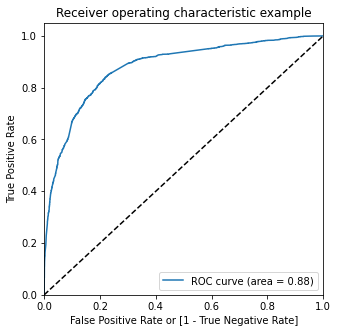

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

The area under the ROC curve is 0.88, which is a very good value.

<b>Finding Optimal Cutoff Point</b>

In [133]:
# To find cutoff we need to create some columns with different probability cutoff.

probability_numbers = [float(x) / 10 for x in range(10)]
for i in probability_numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Probability.map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_ID,Predicted_Value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.357856,2609,0,1,1,1,1,0,0,0,0,0,0
1,1,0.928846,3971,1,1,1,1,1,1,1,1,1,1,1
2,0,0.073244,324,0,1,0,0,0,0,0,0,0,0,0
3,1,0.770867,7127,1,1,1,1,1,1,1,1,1,0,0
4,0,0.984155,3064,1,1,1,1,1,1,1,1,1,1,1


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df=pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388710  1.000000  0.000000
0.1   0.1  0.563043  0.968970  0.304920
0.2   0.2  0.760212  0.908978  0.665614
0.3   0.3  0.802348  0.841539  0.777427
0.4   0.4  0.809746  0.776996  0.830571
0.5   0.5  0.810711  0.704179  0.878453
0.6   0.6  0.792216  0.593711  0.918443
0.7   0.7  0.777099  0.501862  0.952118
0.8   0.8  0.756031  0.415805  0.972376
0.9   0.9  0.718237  0.295408  0.987109


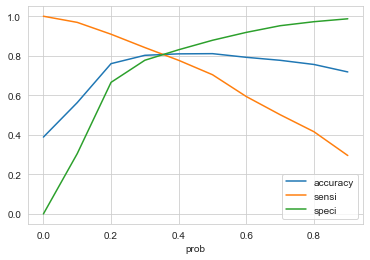

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensi', 'speci'])
plt.show()

From the above curve we can observe that the 0.36 is the optimal point to take it as a cutoff probability.

In [136]:
# Creating dataframe after selecting good cutoff of 0.36.

y_train_pred_final["Predicted_After_Final_Cutoff"] = y_train_pred_final.Conversion_Probability.map(lambda x : 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_ID,Predicted_Value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_After_Final_Cutoff
0,1,0.357856,2609,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.928846,3971,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.073244,324,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.770867,7127,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.984155,3064,1,1,1,1,1,1,1,1,1,1,1,1


<b>Confusion Matrix.</b>

In [137]:
# Create confusion matrix to evaluate the model.

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_After_Final_Cutoff)
confusion2

array([[3078,  723],
       [ 473, 1944]], dtype=int64)

In [138]:
TP=confusion2[1,1]    #True-Positive
TN=confusion2[0,0]    #True-Negative
FP=confusion2[0,1]    #False-Positive
FN=confusion2[1,0]    #False-Negative

<b>Accuracy</b>

In [139]:
# Check for accuracy of model.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_After_Final_Cutoff)

0.8076551945963333

<b>sensitivity</b>

In [140]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.8043028547786513

<b>Specificity</b>

In [141]:
#Let us calculate specificity
TN/float(TN+FP)

0.8097868981846882

<b>False Positive</b>

In [142]:
# Calculate false postive rate - predicting conversion when customer does not have convert
print(FP/float(TN+FP))

0.19021310181531176


<b>Positive Predictive Value</b>

In [143]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7289088863892014


<b>Negative Predictive Value</b>

In [144]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8667980850464658


<b>Precision and Recall</b>

In [145]:
# Check the Precision for model.

Precision = TP/float(TP+FP)
Precision

0.7289088863892014

In [146]:
# Recall
Recall = TP/float(TP + FN)
Recall

0.8043028547786513

In [147]:
# Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

<b>Precision Score</b>

In [148]:
#Precision Value
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Value)

0.7865064695009242

<b>Recall Score</b>

In [149]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Value)

0.7041787339677286

<b>F1-Score</b>

In [150]:
# Check for F1-Score.

F1_Score_ = 2 * ((Precision * Recall) / (Precision + Recall))
F1_Score_

0.7647521636506689

#### Precision and recall tradeoff

In [151]:
from sklearn.metrics import precision_recall_curve

In [152]:
y_train_pred_final.Converted, y_train_pred_final.Predicted_Value

(0       1
 1       1
 2       0
 3       1
 4       0
        ..
 6213    1
 6214    1
 6215    0
 6216    0
 6217    1
 Name: Converted, Length: 6218, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6213    1
 6214    1
 6215    0
 6216    0
 6217    0
 Name: Predicted_Value, Length: 6218, dtype: int64)

In [153]:
p, r, thresholds=precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

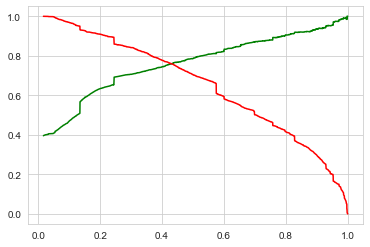

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making Predictions on Test Set

In [155]:
# Perform scalling on test data.

X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [156]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [157]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
8723,0,-0.465877,0,0,0,0,0,1,0,0
8932,0,-0.656721,0,0,0,0,0,0,0,0
6842,0,2.054784,1,0,0,0,0,0,0,0
3018,0,-0.530121,1,0,0,0,0,1,0,0
3869,0,-0.747420,1,0,0,0,0,1,0,0


In [158]:
X_test.shape

(2666, 10)

In [159]:
# Adding a constant.

X_test_sm = sm.add_constant(X_test)

In [160]:
# Making prediction on test set.

y_test_pred = res.predict(X_test_sm)

In [161]:
# Check result.

y_test_pred

8723    0.177032
8932    0.076643
6842    0.600128
3018    0.137286
3869    0.110246
          ...   
385     0.159233
4364    0.098655
3316    0.134515
8034    0.285589
8686    0.708309
Length: 2666, dtype: float64

In [162]:
# Converting y_pred to a dataframe which is an array.

y_pred = pd.DataFrame(y_test_pred)

In [163]:
# Converting y_test to dataframe.

y_test_df = pd.DataFrame(y_test)

In [164]:
# Add Cust ID in index.

y_test_df["Lead_ID"] = y_test_df.index

In [165]:
# Remove index for both dataframes to append them side by side.

y_pred.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [166]:
# Appending y_test_df and y_pred

y_pred_final = pd.concat([y_test_df, y_pred], axis = 1)

In [167]:
y_pred_final.head()

,Converted,Lead_ID,0
0,0,8723,0.177032
1,0,8932,0.076643
2,1,6842,0.600128
3,0,3018,0.137286
4,0,3869,0.110246


In [168]:
# Rename the resulting column

y_pred_final = y_pred_final.rename(columns = {0 : "Converted_Probability_2"})

In [169]:
# Making predictions using selected cutoff of 0.36

y_pred_final["Final_Predicted"] = y_pred_final.Converted_Probability_2.map(lambda x : 1 if x > 0.36 else 0)
y_pred_final.head()

,Converted,Lead_ID,Converted_Probability_2,Final_Predicted
0,0,8723,0.177032,0
1,0,8932,0.076643,0
2,1,6842,0.600128,1
3,0,3018,0.137286,0
4,0,3869,0.110246,0


In [170]:
# Calculating Lead Score

y_pred_final["Lead_Score"] = y_pred_final.Converted_Probability_2.map( lambda x : round(x * 100))
y_pred_final.head()

,Converted,Lead_ID,Converted_Probability_2,Final_Predicted,Lead_Score
0,0,8723,0.177032,0,18
1,0,8932,0.076643,0,8
2,1,6842,0.600128,1,60
3,0,3018,0.137286,0,14
4,0,3869,0.110246,0,11


<b>Accuracy</b>

In [171]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8034508627156789

<b>Confusion Matrix</b>

In [172]:
# Create confusion matrix to evaluate the model.

confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion3

array([[1317,  331],
       [ 193,  825]], dtype=int64)

<b>TP, TN, FP, FN</b>

In [173]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

<b>Sensitivity</b>

In [174]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8104125736738703

<b>Specificity</b>

In [175]:
# Let us calculate specificity
TN / float(TN+FP)

0.7991504854368932

<b>Precision and Recall</b>

In [176]:
#Check precion for model
Precision_2 = TP/float(TP+FP)

In [177]:
# Recall
Recall_2 = TP/float(TP + FN)

<b>Precision Score</b>

In [178]:
precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7136678200692042

<b>Recall Score</b>

In [179]:
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8104125736738703

<b>F1-Score</b>

In [180]:
# Check for F1-Score.

F1_Score = 2 * ((Precision_2 * Recall_2) / (Precision_2 + Recall_2))
F1_Score

0.7589696412143514

<b>False Positive Rate

In [181]:
# Calculate false postive rate - predicting conversion when customer does not have convert
print(FP/float(TN+FP))

0.2008495145631068


<b>Positive Predictive Value</b>

In [182]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7136678200692042


<b>Negative Predictive Value</b>

In [183]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8721854304635761


### Final Observation:

Let us compare the values obtained for Train & Test:

Train Data:
- Accuracy : 80.76%
- Sensitivity : 80.43%
- Specificity : 80.97%

Test Data:
- Accuracy : 80.34%
- Sensitivity : 81.04%
- Specificity : 79.91%

<b>The features which are most mattered in lead conversion are : (Arranging from most important to less important by comparing the coefficient.)</b>

1. Lead Origin_Lead Add Form
2. Lead Source_Welingak Website
3. What is your current occupation_Working Professional
4. Last Notable Activity_SMS Sent
5. Do Not Email
6. Total Time Spent on Website
7. Last Notable Activity_Olark Chat Conversation
8. Lead Source_Olark Chat
9. Last Notable Activity_Email Opened
10. Lead Origin_Landing Page Submission